In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
databr = pd.read_csv("../databases/campeonato-brasileiro-full.csv")

databr.columns

colunasbr = databr[["mandante", "visitante", "vencedor", "mandante_Placar", "visitante_Placar"]]

colunasbr

,mandante,visitante,vencedor,mandante_Placar,visitante_Placar
0,Guarani,Vasco,Guarani,4,2
1,Athletico-PR,Gremio,Athletico-PR,2,0
2,Flamengo,Coritiba,-,1,1
3,Goias,Paysandu,-,2,2
4,Internacional,Ponte Preta,-,1,1
...,...,...,...,...,...
8020,Cuiaba,Coritiba,Cuiaba,2,1
8021,Bragantino,Fluminense,Fluminense,0,1
8022,Corinthians,Atletico-MG,Atletico-MG,0,1
8023,Internacional,Palmeiras,Internacional,3,0


In [3]:
gols_mandantes = colunasbr["mandante_Placar"].sum()
mandantes_media = colunasbr["mandante_Placar"].mean()

gols_visitantes = colunasbr["visitante_Placar"].sum()
visitantes_media = colunasbr["visitante_Placar"].mean()

print("Total de gols dos mandantes:", gols_mandantes)
print("Total de gols dos visitantes:", gols_visitantes)
print("media de gols dos mandantes:", mandantes_media)
print("media de gols dos visitante:", visitantes_media)

Total de gols dos mandantes: 12415
Total de gols dos visitantes: 8225
media de gols dos mandantes: 1.5470404984423676
media de gols dos visitante: 1.0249221183800623


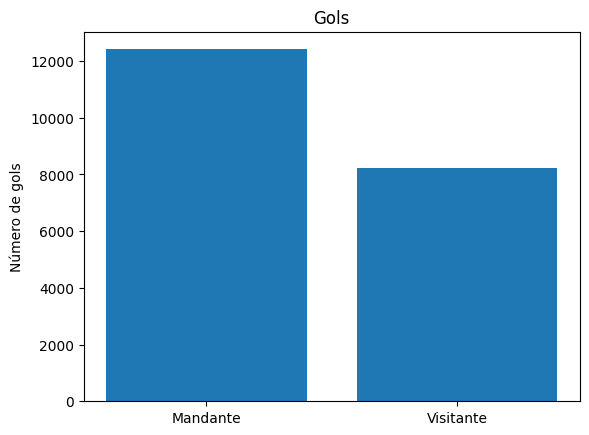

In [4]:
categorias = ['Mandante', 'Visitante']
valores = [gols_mandantes, gols_visitantes]

plt.bar(categorias, valores)
plt.ylabel('Número de gols')
plt.title('Gols')

plt.show()

In [5]:
vitorias = databr[databr["vencedor"] != "-"]

mandante_vitorias = (vitorias["vencedor"] == vitorias["mandante"]).sum()

visitante_vitorias = (vitorias["vencedor"] == vitorias["visitante"]).sum()

empates = (databr["vencedor"] == "-").sum()

print(f"Vitórias do mandante: {mandante_vitorias}")
print(f"Vitórias do visitante: {visitante_vitorias}")
print(f"Empates: {empates}")

Vitórias do mandante: 4001
Vitórias do visitante: 1901
Empates: 2123


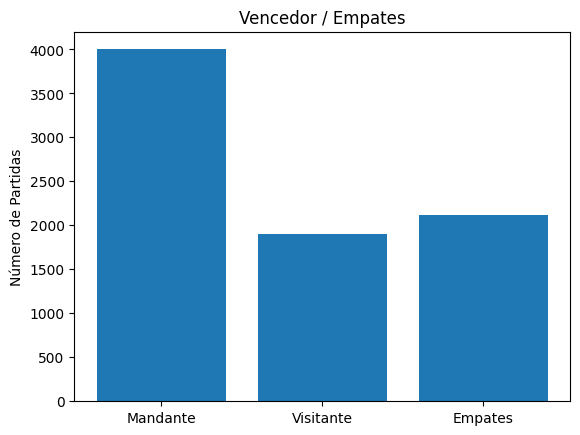

In [6]:
categorias = ['Mandante', 'Visitante', 'Empates']
valores = [mandante_vitorias, visitante_vitorias, empates]

plt.bar(categorias, valores)
plt.ylabel('Número de Partidas')
plt.title('Vencedor / Empates')

plt.show()

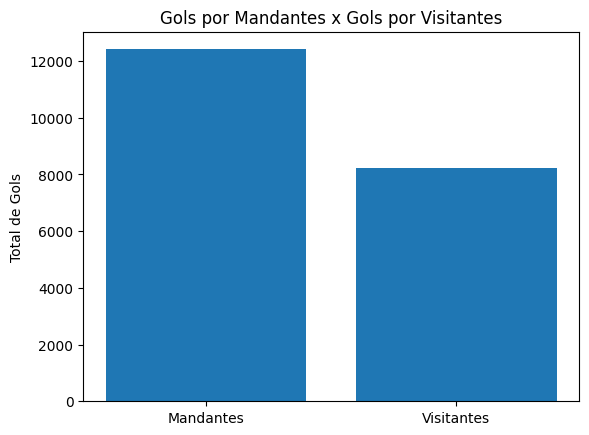

In [7]:
categorias = ['Mandantes', 'Visitantes']
valores = [gols_mandantes, gols_visitantes]

plt.bar(categorias, valores)
plt.ylabel('Total de Gols')
plt.title('Gols por Mandantes x Gols por Visitantes')

plt.show()

In [8]:
col = 'mandante_Placar'
n_sub = 10000 
size = len(databr)
values = np.zeros(n_sub)

def bootstrap(n_sub, size, col):
    for i in range(n_sub):
        sample = databr[col].sample(size, replace=True)

        values[i] = sample.mean()

    LI = np.percentile(values, 2.5)
    LS = np.percentile(values, 97.5)
    return values, LI, LS

values, LI, LS = bootstrap(n_sub, size, col)
print('Intervalo de Confianca: [{}, {}]'.format(LI.round(4), LS.round(4)))

Intervalo de Confianca: [1.5205, 1.5742]


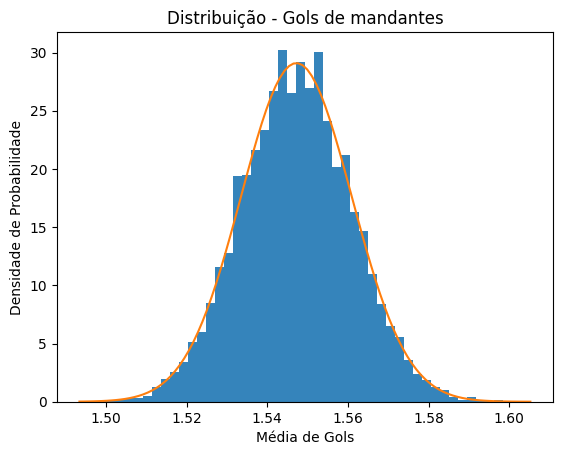

In [9]:
plt.hist(values, bins=50, density=True, alpha=0.9)

mean_bootstrap = np.mean(values)
std_bootstrap = np.std(values)
x = np.linspace(min(values), max(values), 100)
y = (1/(std_bootstrap * np.sqrt(2 * np.pi))) * np.exp(-((x - mean_bootstrap)**2) / (2 * std_bootstrap**2))
plt.plot(x, y)

plt.xlabel('Média de Gols')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição - Gols de mandantes')

plt.show()

In [10]:
col = 'visitante_Placar'
n_sub = 10000 
size = len(databr)
values = np.zeros(n_sub)

def bootstrap(n_sub, size, col):
    for i in range(n_sub):
        sample = databr[col].sample(size, replace=True)

        values[i] = sample.mean()

    LI = np.percentile(values, 2.5)
    LS = np.percentile(values, 97.5)
    return values, LI, LS

values, LI, LS = bootstrap(n_sub, size, col)
print('Intervalo de Confianca: [{}, {}]'.format(LI.round(4), LS.round(4)))

Intervalo de Confianca: [1.0024, 1.047]


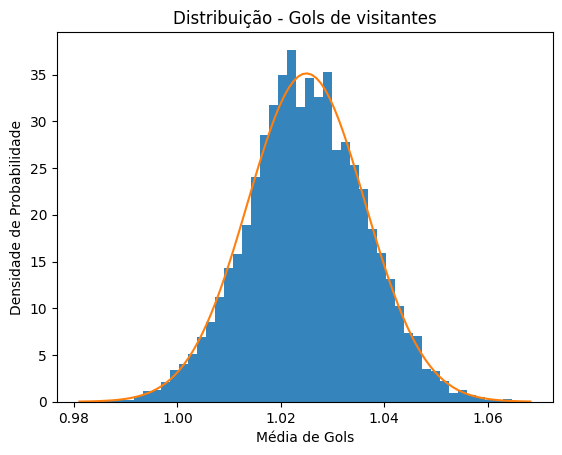

In [11]:
plt.hist(values, bins=50, density=True, alpha=0.9)

mean_bootstrap = np.mean(values)
std_bootstrap = np.std(values)
x = np.linspace(min(values), max(values), 100)
y = (1/(std_bootstrap * np.sqrt(2 * np.pi))) * np.exp(-((x - mean_bootstrap)**2) / (2 * std_bootstrap**2))
plt.plot(x, y)

plt.xlabel('Média de Gols')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição - Gols de visitantes')

plt.show()

In [12]:
colunasbr['vencedor_mandante'] = (colunasbr['vencedor'] == colunasbr['mandante']).astype(int)
colunasbr['vencedor_visitante'] = (colunasbr['vencedor'] == colunasbr['visitante']).astype(int)

colunasbr

/tmp/ipykernel_14602/539394860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colunasbr['vencedor_mandante'] = (colunasbr['vencedor'] == colunasbr['mandante']).astype(int)
/tmp/ipykernel_14602/539394860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colunasbr['vencedor_visitante'] = (colunasbr['vencedor'] == colunasbr['visitante']).astype(int)


,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,vencedor_mandante,vencedor_visitante
0,Guarani,Vasco,Guarani,4,2,1,0
1,Athletico-PR,Gremio,Athletico-PR,2,0,1,0
2,Flamengo,Coritiba,-,1,1,0,0
3,Goias,Paysandu,-,2,2,0,0
4,Internacional,Ponte Preta,-,1,1,0,0
...,...,...,...,...,...,...,...
8020,Cuiaba,Coritiba,Cuiaba,2,1,1,0
8021,Bragantino,Fluminense,Fluminense,0,1,0,1
8022,Corinthians,Atletico-MG,Atletico-MG,0,1,0,1
8023,Internacional,Palmeiras,Internacional,3,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

dados_regressao = colunasbr[['mandante_Placar', 'vencedor_mandante']]

X = dados_regressao[['mandante_Placar']]
y = dados_regressao['vencedor_mandante']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
matriz_confusao = confusion_matrix(y_test, previsoes)

print(f'Acurácia do modelo: {acuracia}')
print(f'Matriz de Confusão:\n{matriz_confusao}')

Acurácia do modelo: 0.7912772585669782
Matriz de Confusão:
[[670 148]
 [187 600]]


In [14]:
X_train_com_intercept = sm.add_constant(X_train)

modelo_statsmodels = sm.Logit(y_train, X_train_com_intercept)

resultado = modelo_statsmodels.fit()

print(resultado.summary())


Optimization terminated successfully.
         Current function value: 0.451944
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      vencedor_mandante   No. Observations:                 6420
Model:                          Logit   Df Residuals:                     6418
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.3480
Time:                        21:47:28   Log-Likelihood:                -2901.5
converged:                       True   LL-Null:                       -4450.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.4821      0.067    -36.841      0.000      -2.614      -2.350
mandante_Placa

In [15]:
golsMandante = float(input("Insira o número de gols do mandante: "))

dados_teste = pd.DataFrame({'mandante_Placar': [golsMandante]})
previsao = modelo.predict(dados_teste)

if previsao[0] == 1:
    print("O modelo prevê que o mandante vencerá.")
else:
    print("O modelo prevê que o mandante não vencerá.")

O modelo prevê que o mandante vencerá.
